In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Original data')

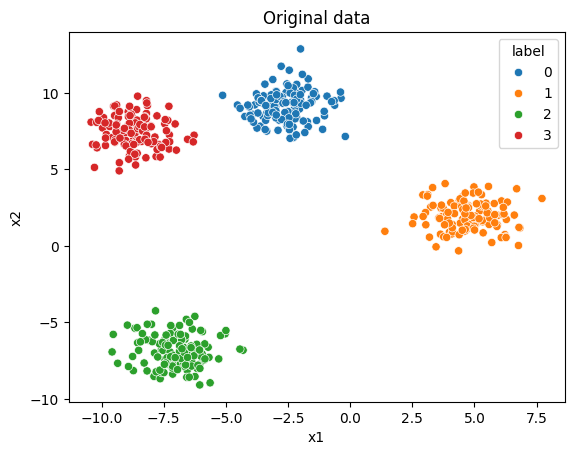

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4, cluster_std=1, random_state=42)

df = pd.DataFrame([X[:, 0], X[:, 1], y]).T

df.columns = ['x1', 'x2', 'label']
df['label'] = df.label.astype(int)

sns.scatterplot(x='x1', y='x2', hue='label', data=df, palette='tab10')
plt.title("Original data")

In [10]:
X = df.drop('label', axis=1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

Text(0.5, 1.0, 'Scaled X with feature standardization')

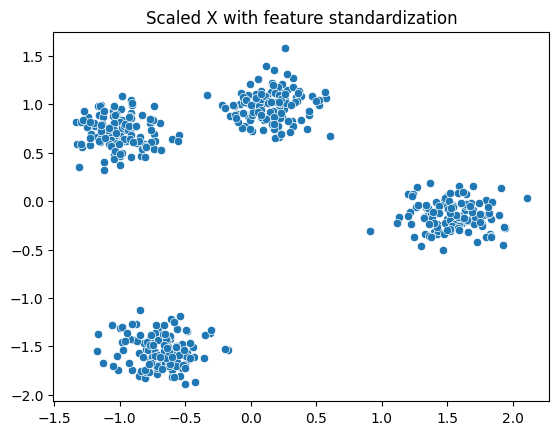

In [15]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization")

[1000.0, 601.2655029229385, 116.09567852755531, 28.78693897887402, 26.038516656082972, 23.96812176951111, 22.00878074157435, 19.82706543360911, 16.69762431070871]


[Text(0.5, 1.0, 'Elbow plot to find k'),
 Text(0.5, 0, 'Number of clusters'),
 Text(0, 0.5, 'Sum of squared distances')]

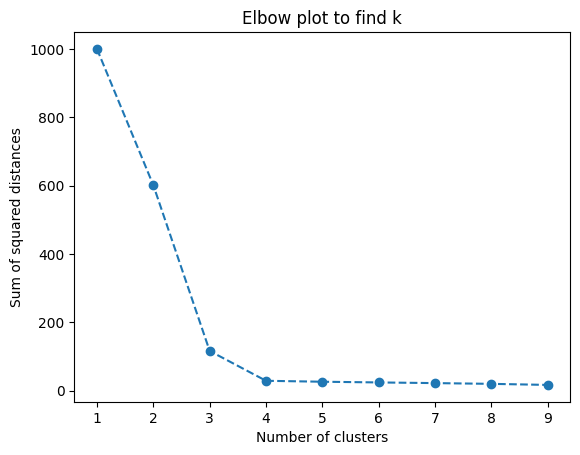

In [22]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_of_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters] # För varje k, skapa en KMeans modell

print(sum_of_squared_distances)

fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_of_squared_distances, '--o')
ax.set(title="Elbow plot to find k", xlabel="Number of clusters", ylabel="Sum of squared distances")

In [21]:
ssd_differance = pd.Series(sum_of_squared_distances).diff()[1:]
ssd_differance.index = clusters[:-1]
ssd_differance

1   -398.734497
2   -485.169824
3    -87.308740
4     -3.174395
5     -2.754493
6     -0.430849
7     -3.128985
8     -2.536009
dtype: float64

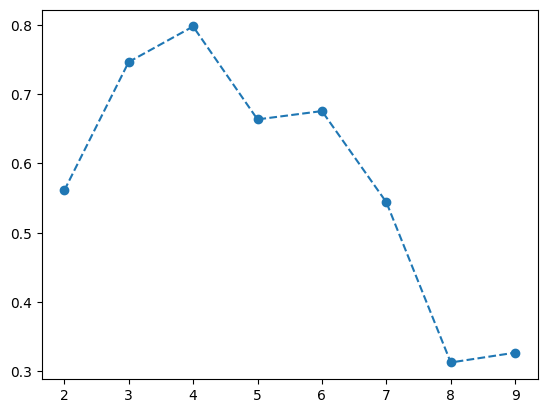

In [25]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()

kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, 'o--')

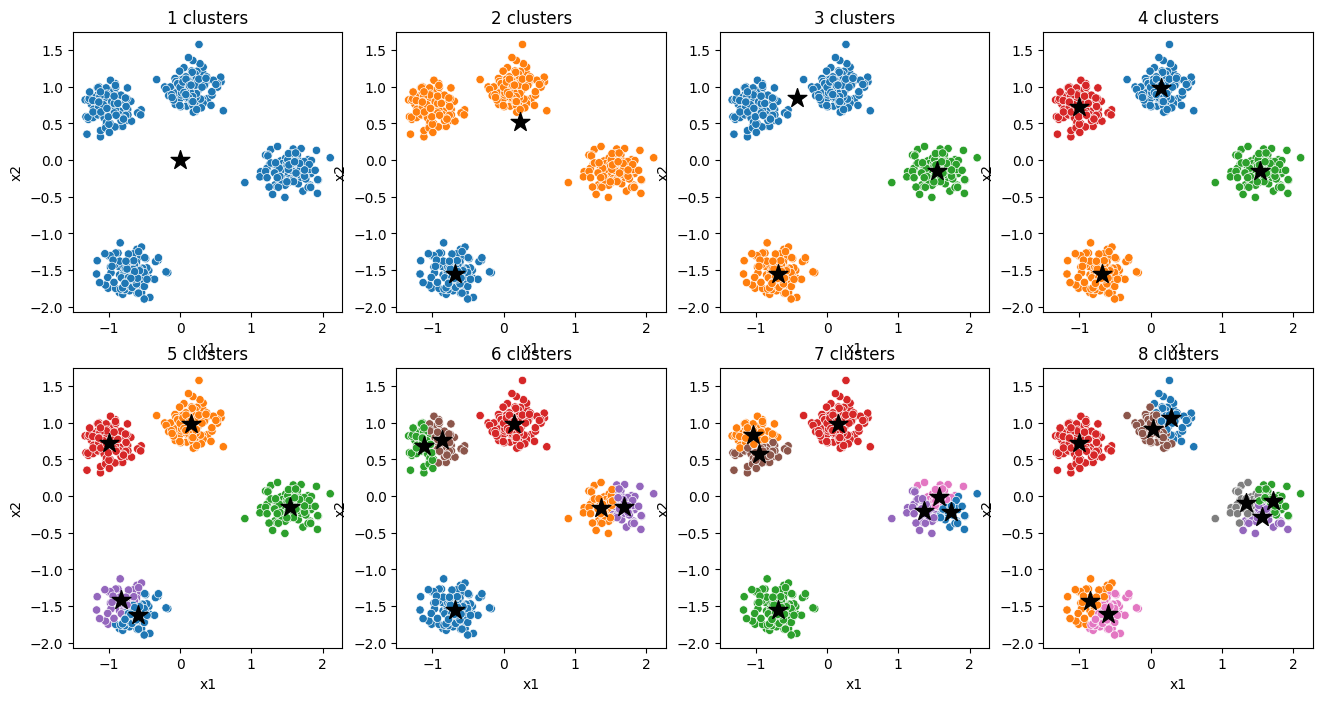

In [35]:
df_plot = pd.DataFrame(scaled_X, columns=['x1', 'x2'])
kmeans = [KMeans(n_clusters=k).fit(scaled_X) for k in clusters]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_
    sns.scatterplot(x='x1', y='x2', hue='label', data=df_plot, palette='tab10', ax=ax)
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='*', s=200)
    ax.legend().remove()
    ax.set(title = f"{i+1} clusters")